In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
%cd /content/drive/MyDrive/movie_rec

/content/drive/MyDrive/movie_rec


# Importing neccessary libraries

In [61]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import requests
import ast

## Read 2 dataframes

In [62]:
#Read the data
movies_df = pd.read_csv('data/movies_metadata.csv')
ratings_df = pd.read_csv('data/ratings.csv')

<ipython-input-62-5228c60e6f92>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('data/movies_metadata.csv')


In [63]:
movies_df.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [64]:
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


# 1. Exploring data

## How many rows and how many columns?

In [65]:
print(f"The movie data has {movies_df.shape[0]} rows and {movies_df.shape[1]} columns.")
print(f"The ratings data has {ratings_df.shape[0]} rows and {ratings_df.shape[1]} columns.")

The movie data has 45466 rows and 24 columns.
The ratings data has 26024289 rows and 4 columns.


## What is the current data type of each column? Are there columns having inappropriate data types?

In [66]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

The budget and release_date columns have object type, which is inapproriate.

In [67]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


## With each numerical column, how are values distributed in movies dataframe?

In [68]:
num_col_info_df = movies_df.select_dtypes(exclude='object')
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)


num_col_info_df = num_col_info_df.agg([missing_ratio, "min", "max"])
num_col_info_df

,revenue,runtime,vote_average,vote_count
missing_ratio,0.000000e+00,0.6,0.0,0.0
min,0.000000e+00,0.0,0.0,0.0
max,2.787965e+09,1256.0,10.0,14075.0


# 2. Data Preprocessing

I will start perform data preprocessing on movies data because the data format is inapproriate.

In [69]:
movies_df = pd.read_csv('data/movies_metadata.csv')
movies_df = movies_df[["id", "title", "genres", "production_companies", "production_countries", "release_date", "budget", "revenue", "runtime", "vote_average", "vote_count"]]
movies_df.head(10)

<ipython-input-69-997239cb65db>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('data/movies_metadata.csv')


,id,title,genres,production_companies,production_countries,release_date,budget,revenue,runtime,vote_average,vote_count
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,30000000,373554033.0,81.0,7.7,5415.0
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,65000000,262797249.0,104.0,6.9,2413.0
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,0.0,101.0,6.5,92.0
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,16000000,81452156.0,127.0,6.1,34.0
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,0,76578911.0,106.0,5.7,173.0
5,949,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,60000000,187436818.0,170.0,7.7,1886.0
6,11860,Sabrina,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,58000000,0.0,127.0,6.2,141.0
7,45325,Tom and Huck,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,0.0,97.0,5.4,45.0
8,9091,Sudden Death,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,35000000,64350171.0,106.0,5.5,174.0
9,710,GoldenEye,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,58000000,352194034.0,130.0,6.6,1194.0


In [70]:
# movies_df = movies_df.sort_values(by="id")
# movies_df = movies_df.set_index("id")
id_data = pd.read_csv("data/links_small.csv", dtype={"movieId":"object", "imdbId":"object", "tmdbId":"object"})
id_data = id_data.rename(columns={"tmdbId": "id"})
id_data["id"] = id_data["id"].astype("object")

In [71]:
movies_data = movies_df.merge(id_data, on='id')


In [72]:
movies_data = movies_data.set_index("movieId")
movies_data = movies_data.drop(columns=["id", "imdbId"])
movies_data.head(10)

,title,genres,production_companies,production_countries,release_date,budget,revenue,runtime,vote_average,vote_count
movieId,,,,,,,,,,
1,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,30000000,373554033.0,81.0,7.7,5415.0
2,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,65000000,262797249.0,104.0,6.9,2413.0
3,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,0.0,101.0,6.5,92.0
4,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,16000000,81452156.0,127.0,6.1,34.0
5,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,0,76578911.0,106.0,5.7,173.0
6,Heat,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,60000000,187436818.0,170.0,7.7,1886.0
7,Sabrina,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,58000000,0.0,127.0,6.2,141.0
8,Tom and Huck,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,0.0,97.0,5.4,45.0
9,Sudden Death,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,35000000,64350171.0,106.0,5.5,174.0


In [73]:
def extract_names(def_list):
    names = ast.literal_eval(def_list)  # Convert string to list of dictionaries
    return ', '.join(name['name'] for name in names)

movies_data['genres'] = movies_data['genres'].apply(extract_names)
movies_data['production_companies'] = movies_data['production_companies'].apply(extract_names)
movies_data['production_countries'] = movies_data['production_countries'].apply(extract_names)
movies_data.head(10)

,title,genres,production_companies,production_countries,release_date,budget,revenue,runtime,vote_average,vote_count
movieId,,,,,,,,,,
1,Toy Story,"Animation, Comedy, Family",Pixar Animation Studios,United States of America,1995-10-30,30000000,373554033.0,81.0,7.7,5415.0
2,Jumanji,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,65000000,262797249.0,104.0,6.9,2413.0
3,Grumpier Old Men,"Romance, Comedy","Warner Bros., Lancaster Gate",United States of America,1995-12-22,0,0.0,101.0,6.5,92.0
4,Waiting to Exhale,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America,1995-12-22,16000000,81452156.0,127.0,6.1,34.0
5,Father of the Bride Part II,Comedy,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,0,76578911.0,106.0,5.7,173.0
6,Heat,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,1995-12-15,60000000,187436818.0,170.0,7.7,1886.0
7,Sabrina,"Comedy, Romance","Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",1995-12-15,58000000,0.0,127.0,6.2,141.0
8,Tom and Huck,"Action, Adventure, Drama, Family",Walt Disney Pictures,United States of America,1995-12-22,0,0.0,97.0,5.4,45.0
9,Sudden Death,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Si...",United States of America,1995-12-22,35000000,64350171.0,106.0,5.5,174.0


In [74]:
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data.to_csv("data/preprocessed_data.csv")

## 3. EDA

### 1. Top 10 movies with highest ratings

In [75]:
top_10_movies = movies_data.nlargest(10, 'vote_average')

print(top_10_movies[["title", "genres"]])

                                            title                  genres
movieId                                                                  
189                                      Reckless  Fantasy, Comedy, Drama
722      The Haunted World of Edward D. Wood, Jr.             Documentary
756        Carmen Miranda: Bananas Is My Business             Documentary
1870                        Dancer, Texas Pop. 81   Comedy, Drama, Family
26655      Common Threads: Stories from the Quilt    History, Documentary
55757                     Chilly Scenes of Winter  Comedy, Drama, Romance
160590                        Survive and Advance                        
93040                               The Civil War             Documentary
8954                        Lightning in a Bottle                        
98803                        Little Miss Broadway    Drama, Family, Music


### 2. Top 10 movies with highest revenue

In [76]:
top_10_revenues = movies_data.nlargest(10, 'revenue')

print(top_10_revenues[["title", "revenue"]])

                                                title       revenue
movieId                                                            
72998                                          Avatar  2.787965e+09
122886                   Star Wars: The Force Awakens  2.068224e+09
1721                                          Titanic  1.845034e+09
89745                                    The Avengers  1.519558e+09
117529                                 Jurassic World  1.513529e+09
130634                                      Furious 7  1.506249e+09
122892                        Avengers: Age of Ultron  1.405404e+09
88125    Harry Potter and the Deathly Hallows: Part 2  1.342000e+09
106696                                         Frozen  1.274219e+09
102125                                     Iron Man 3  1.215440e+09


### 3. Which month has the highes revenue?

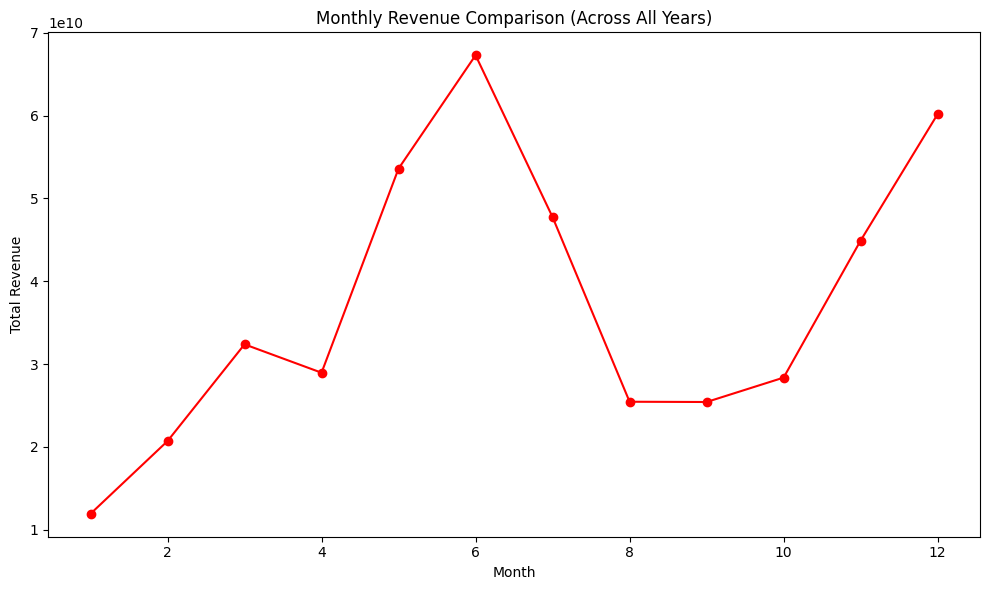

In [77]:
movies_data['month'] = movies_data['release_date'].dt.month

revenue_by_month = movies_data.groupby('month')['revenue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='line', marker='o', color='r')

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Comparison (Across All Years)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

We can see that movies from summer and winter gain the most revenue.

### 4. Compare every genre by revenue.

In [79]:
genre_revenue_df = movies_data[["genres", "revenue"]]

genre_revenue_df
genre_revenue_df['genres'] = genre_revenue_df['genres'].str.split(', ')
df_exploded = genre_revenue_df.explode('genres').reset_index()

print(df_exploded)

      movieId           genres      revenue
0           1        Animation  373554033.0
1           1           Comedy  373554033.0
2           1           Family  373554033.0
3           2        Adventure  262797249.0
4           2          Fantasy  262797249.0
...       ...              ...          ...
22486    5672        Animation   28023563.0
22487    5672  Science Fiction   28023563.0
22488    5672           Family   28023563.0
22489  114342           Comedy    1359497.0
22490  114342            Drama    1359497.0

[22491 rows x 3 columns]


<ipython-input-79-82142c76ae69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_revenue_df['genres'] = genre_revenue_df['genres'].str.split(', ')


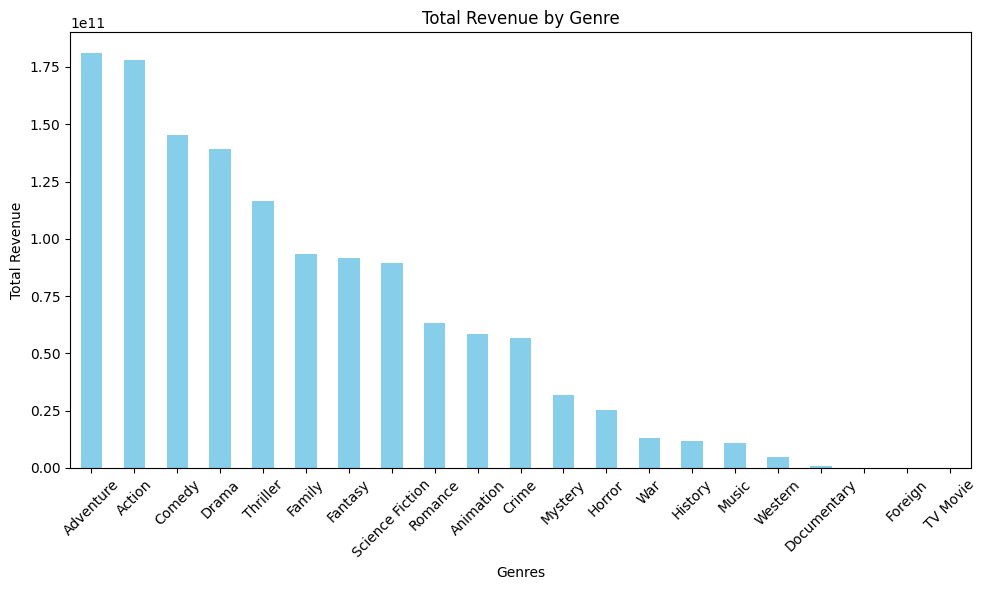

In [80]:
revenue_by_genre = df_exploded.groupby('genres')['revenue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_genre.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.xlabel('Genres')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Genre')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Adventure and action genres genrate the most income, comedy and drama are in third and fourth.